# Mathematical Transformation
- Log Transformation
- Reciprocal Transformation
- Square Transformation
- Square Root Transformation

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score

In [91]:
df = pd.read_csv('../../datasets/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [92]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [93]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

df.head()

/tmp/ipykernel_166277/550127950.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [94]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [95]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [96]:
x = df.iloc[:, 1:3]
y = df.iloc[:, 0]

print(f"{x=}\n{y=}")

x=           Age     Fare
0    22.000000   7.2500
1    38.000000  71.2833
2    26.000000   7.9250
3    35.000000  53.1000
4    35.000000   8.0500
..         ...      ...
886  27.000000  13.0000
887  19.000000  30.0000
888  29.699118  23.4500
889  26.000000  30.0000
890  32.000000   7.7500

[891 rows x 2 columns]
y=0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/tmp/ipykernel_166277/1948101492.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


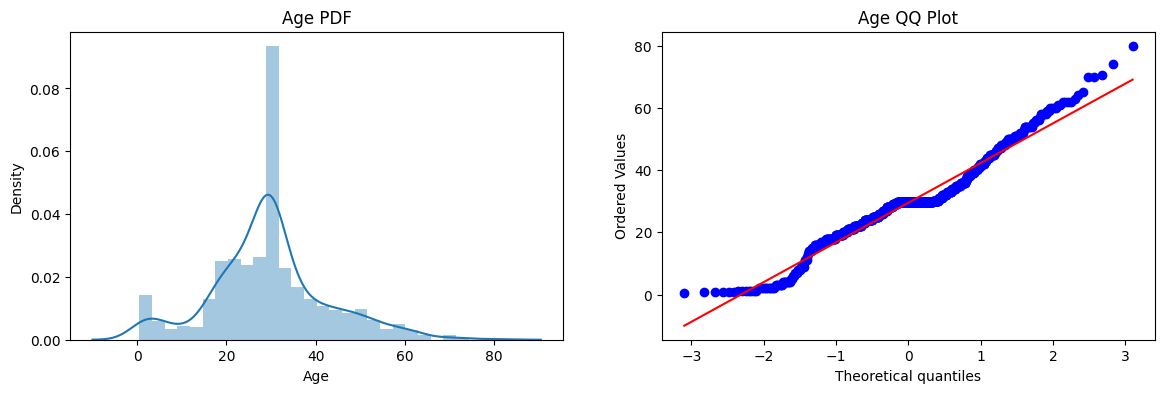

In [98]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

/tmp/ipykernel_166277/4217090933.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


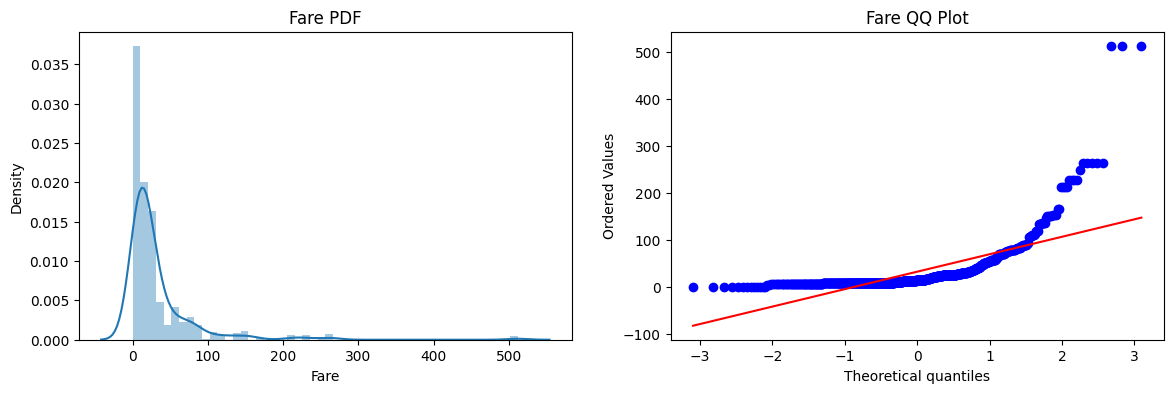

In [99]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [100]:
logistic_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()

In [101]:
logistic_clf.fit(x_train, y_train)
decision_tree_clf.fit(x_train, y_train)

logistic_y_predict = logistic_clf.predict(x_test)
decision_tree_y_predict = decision_tree_clf.predict(x_test)

print(f'LR: {accuracy_score(y_test, logistic_y_predict)}\nDT: {accuracy_score(y_test, decision_tree_y_predict)}')

LR: 0.6480446927374302
DT: 0.6536312849162011


In [102]:
function_transformer = FunctionTransformer(func=np.log1p)

In [103]:
x_train_transformed = function_transformer.fit_transform(x_train)
x_test_transformed = function_transformer.transform(x_test)

In [104]:
logistic_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()

logistic_clf.fit(x_train_transformed, y_train)
decision_tree_clf.fit(x_train_transformed, y_train)

logistic_y_predict = logistic_clf.predict(x_test_transformed)
decision_tree_y_predict = decision_tree_clf.predict(x_test_transformed)

print(f'LR: {accuracy_score(y_test, logistic_y_predict)}\nDT: {accuracy_score(y_test, decision_tree_y_predict)}')

LR: 0.6815642458100558
DT: 0.6703910614525139


In [105]:
x_transformed = function_transformer.fit_transform(x)

logistic_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()

lr = np.mean(cross_val_score(logistic_clf, x_transformed, y, scoring='accuracy', cv=10))
dt = np.mean(cross_val_score(decision_tree_clf, x_transformed, y, scoring='accuracy', cv=10))

print(f'{lr=} {dt=}')

lr=0.678027465667915 dt=0.6644319600499377


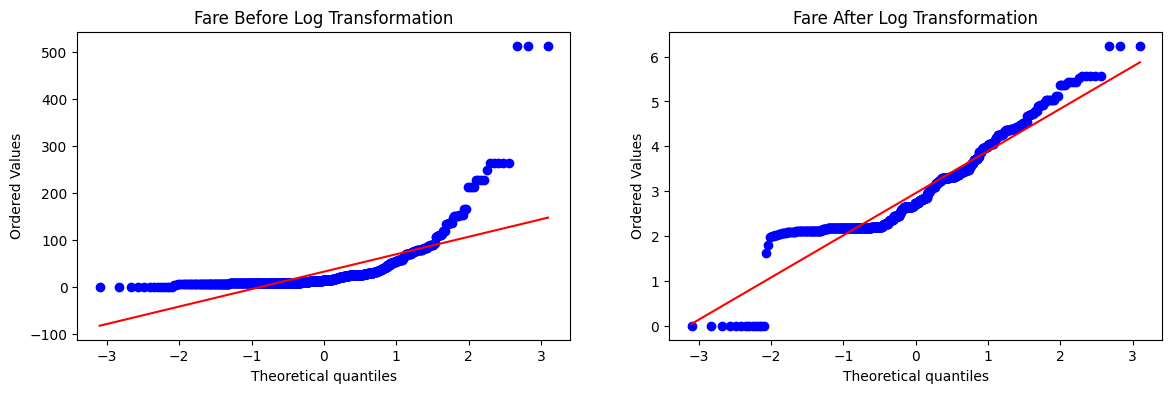

In [106]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log Transformation')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log Transformation')

plt.show()

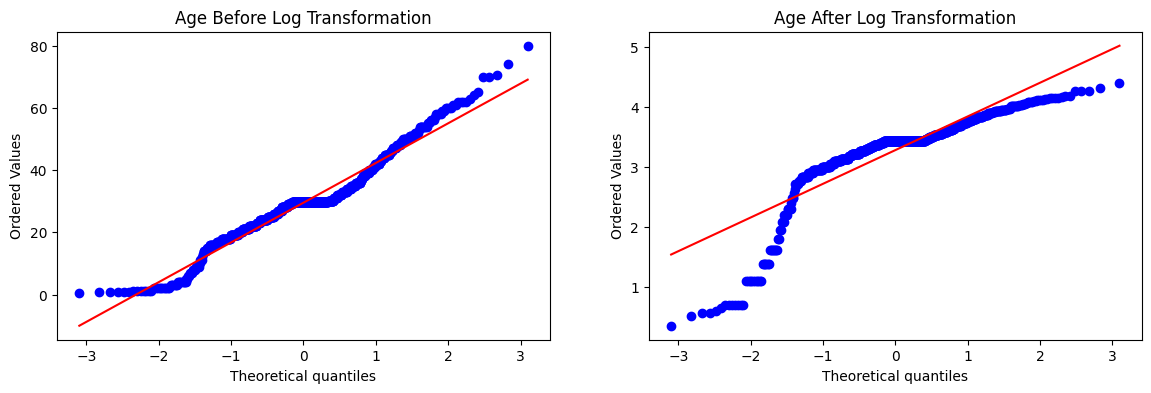

In [107]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log Transformation')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Log Transformation')

plt.show()

In [108]:
column_transformer = ColumnTransformer(
    [('log', FunctionTransformer(np.log1p), ['Fare'])],
    remainder='passthrough'
)

x_train_transformed2 = column_transformer.fit_transform(x_train)
x_test_transformed2 = column_transformer.transform(x_test)


In [109]:
logistic_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()

logistic_clf.fit(x_train_transformed2, y_train)
decision_tree_clf.fit(x_train_transformed2, y_train)

logistic_y_predict = logistic_clf.predict(x_test_transformed2)
decision_tree_y_predict = decision_tree_clf.predict(x_test_transformed2)

print('LR: ', accuracy_score(y_test, logistic_y_predict))
print('DT: ', accuracy_score(y_test, decision_tree_y_predict))

LR:  0.6703910614525139
DT:  0.6480446927374302


In [110]:
x_transformed2 = column_transformer.fit_transform(x)

logistic_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()

lr = np.mean(cross_val_score(logistic_clf, x_transformed2, y, scoring='accuracy', cv=10))
dt = np.mean(cross_val_score(decision_tree_clf, x_transformed2, y, scoring='accuracy', cv=10))

print(f'{lr=} {dt=}')

lr=0.6712609238451936 dt=0.6577153558052433


In [111]:
def apply_transformation(transform):
    x = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    column_transformer = ColumnTransformer(
        [('log', FunctionTransformer(transform), ['Fare'])],
        remainder='passthrough'
    )

    x_trans = column_transformer.fit_transform(x)
    logistic_clf = LogisticRegression()

    accuracy = np.mean(cross_val_score(logistic_clf, x_trans, y, scoring='accuracy', cv=10))
    print(f"{accuracy=}")

    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transformation')

    plt.subplot(122)
    stats.probplot(x_trans[:, 0], dist='norm', plot=plt)
    plt.title('Fare After Transformation')

    plt.show()

accuracy=0.6589013732833957


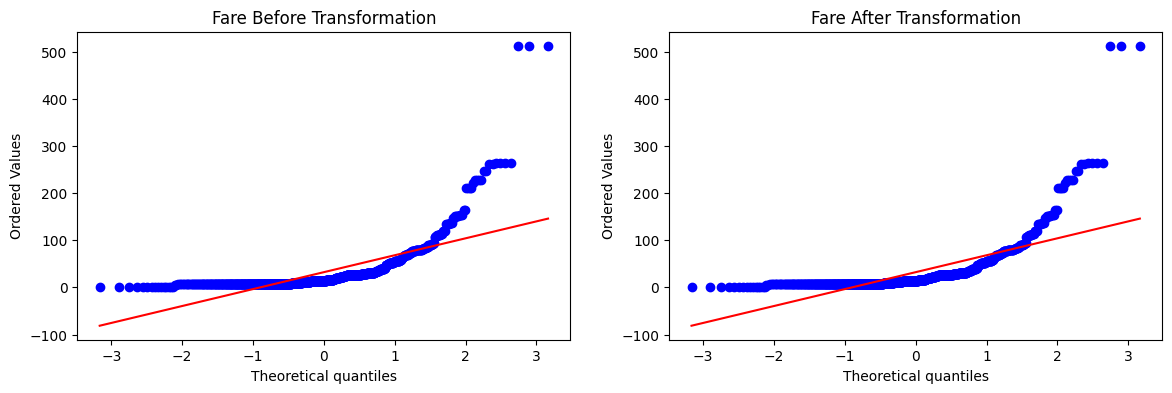

In [112]:
# No Transformation
apply_transformation(lambda x: x)

accuracy=0.6431335830212235


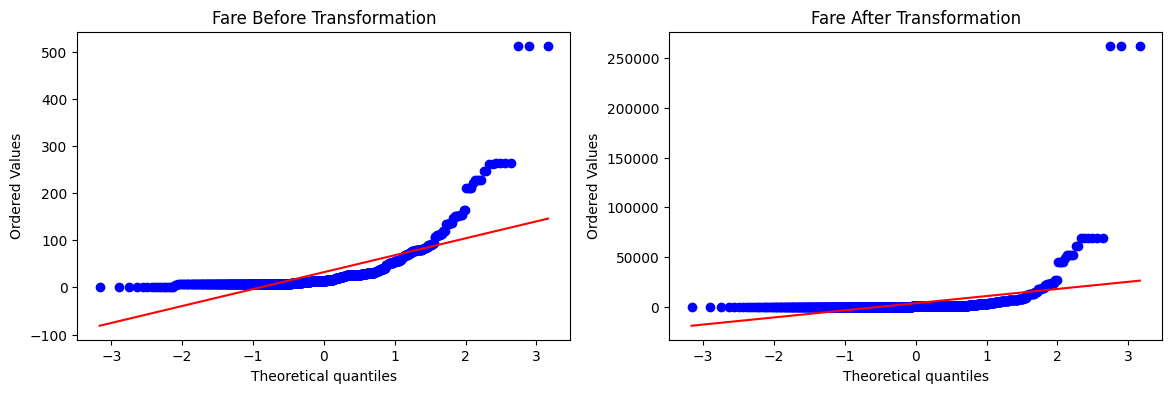

In [113]:
# Square Transformation
apply_transformation(lambda x: x**2)

accuracy=0.6611485642946316


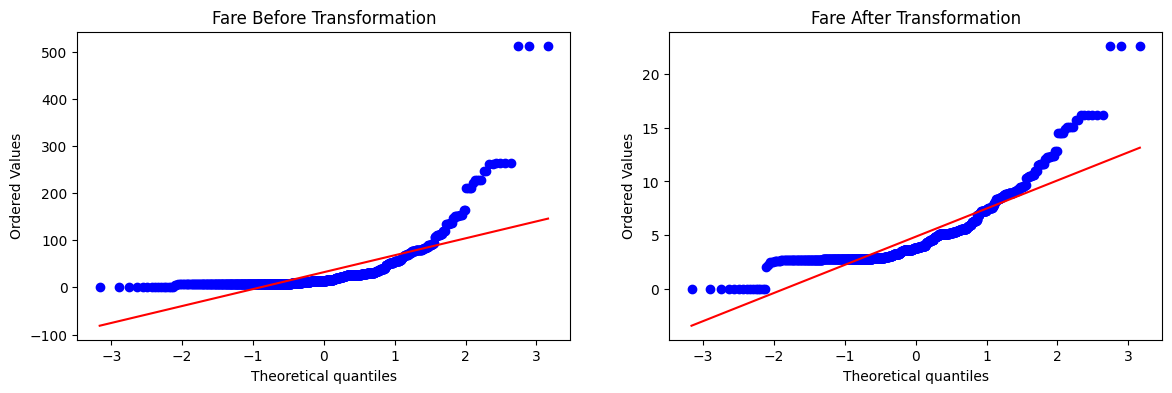

In [114]:
# Square Root Transformation
apply_transformation(lambda x: (x**(1/2)))

accuracy=0.61729088639201


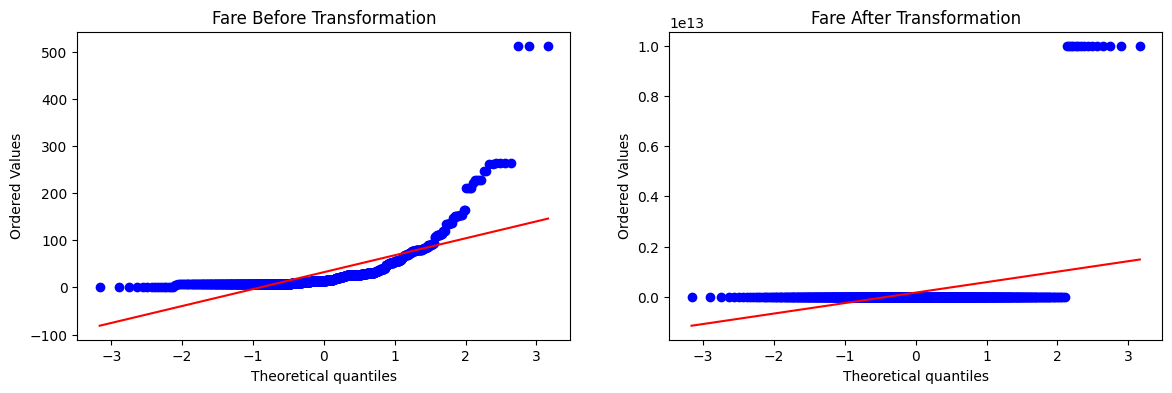

In [115]:
# Reciprocal Transformation
apply_transformation(lambda x: 1/(x + 0.0000000000001))

accuracy=0.6712609238451936


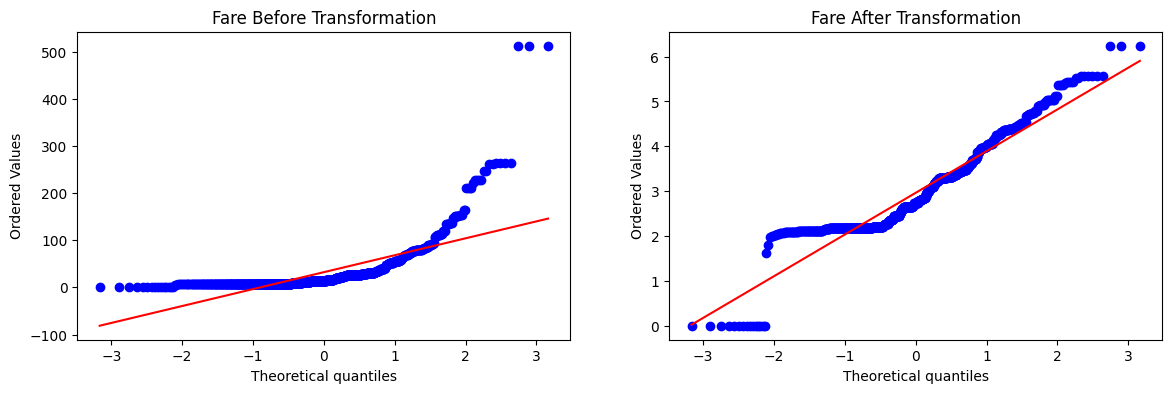

In [116]:
# Log Transformation
apply_transformation(np.log1p)

accuracy=0.616167290886392


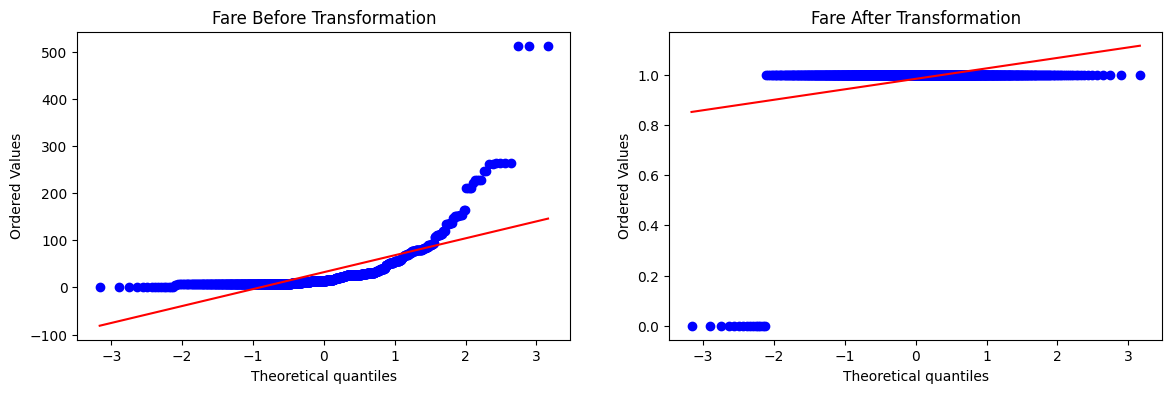

In [117]:
apply_transformation(np.sign)